## 14_Model_Logistic_Core_Features

Author: Daniel Hui

License: MIT

This notebook is comprised of a logistic model of the core features (excluding the book titles)

In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Global Variables
These names correspond to different data sets and targets. Comment them in/out to test different target ranges

In [2]:
target_range = "18_Half"

### Load Dataset

In [3]:
checkout_target_df = pd.read_csv(f'../01_Data/07_Merged_Target_Feature_Data/{target_range}_set.csv',index_col=0)

In [4]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
0,3177276,0,1,0,2016,0,0,1,0,0,0,0,0,0,0,0,14,45,78,94,17,18,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1
1,395432,0,1,1,1985,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,123754,1,1,0,1945,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
count,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000
mean,2234258.6919,0.4945,0.9982,0.8704,1983.6751,0.2787,0.0825,0.6330,0.0375,0.0212,0.0386,0.1546,0.0472,0.0240,0.0191,0.0320,0.7237,2.3485,4.8724,9.6092,2.4991,2.8845,0.1122,0.0724,0.0847,0.0708,0.8960,0.0652,0.0327,0.0950,0.0347,0.0525,0.1073,0.0404,0.0234,0.1006,0.0491,0.0200,0.0331,0.1286,0.0692,0.0249,0.0464,0.0653,0.0317,0.1011,0.0575,0.0150,0.0691
std,953967.6490,0.5000,0.0423,0.3359,189.6728,0.4484,0.2751,0.4820,0.1899,0.1439,0.1927,0.3616,0.2121,0.1531,0.1368,0.1760,5.1280,12.2969,20.5221,34.4055,3.0947,4.7797,0.3156,0.2591,0.2785,0.2565,0.3053,0.2469,0.1778,0.2933,0.1830,0.2231,0.3095,0.1970,0.1510,0.3008,0.2161,0.1401,0.1789,0.3348,0.2537,0.1560,0.2104,0.2471,0.1752,0.3015,0.2327,0.1214,0.2537
min,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1848333.5000,0.0000,1.0000,1.0000,1996.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2554562.0000,0.0000,1.0000,1.0000,2007.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2957797.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,7.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,3343666.0000,1.0000,1.0000,1.0000,2022.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,585.0000,1436.0000,1613.0000,2621.0000,27.0000,290.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
checkout_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397147 entries, 0 to 397146
Data columns (total 49 columns):
BibNum         397147 non-null int64
Checkout       397147 non-null int64
Title          397147 non-null int64
ISBN           397147 non-null int64
Year           397147 non-null int64
Fiction        397147 non-null int64
Language       397147 non-null int64
Nonfiction     397147 non-null int64
Biography      397147 non-null int64
Large Print    397147 non-null int64
Picture        397147 non-null int64
Children       397147 non-null int64
Teen           397147 non-null int64
Mystery        397147 non-null int64
AfAm           397147 non-null int64
Comic          397147 non-null int64
30 Days        397147 non-null int64
90 Days        397147 non-null int64
180 Days       397147 non-null int64
365 Days       397147 non-null int64
Branches       397147 non-null int64
Copies         397147 non-null int64
bal            397147 non-null int64
bea            397147 non-null int64
b

In [7]:
len(checkout_target_df)

397147

### Train / Test / Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [9]:
y = checkout_target_df["Checkout"]
X = checkout_target_df.drop(["Checkout","BibNum"],axis=1)

#hold out portion of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [10]:
print(len(X_train),len(X_test))

317717 79430


### Logistic Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [12]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
lr_model = LogisticRegression(C=10000)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_train_pred = lr_model.predict(X_train_scaled)
print("Train Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))
print("Train Precision: ",metrics.precision_score(y_train, y_train_pred))
print("Train Recall: ",metrics.recall_score(y_train, y_train_pred))
print("Train F1: ",metrics.f1_score(y_train, y_train_pred))

Train Accuracy:  0.8040237066320027
Train Precision:  0.7554287500134709
Train Recall:  0.8925595105460519
Train F1:  0.8182887360320319


In [16]:
X_test_scaled = std_scale.transform(X_test)
y_test_pred = lr_model.predict(X_test_scaled)
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))
print("Test Precision: ",metrics.precision_score(y_test, y_test_pred))
print("Test Recall: ",metrics.recall_score(y_test, y_test_pred))
print("Test F1: ",metrics.f1_score(y_test, y_test_pred))

Test Accuracy:  0.806332619916908
Test Precision:  0.7576912312428685
Test Recall:  0.8950205991556889
Test F1:  0.8206503363607746


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [17]:
confusion_matrix(y_test, y_test_pred)

array([[28853, 11255],
       [ 4128, 35194]])

### Extract Coefficients

In [18]:
coefficients = lr_model.coef_[0]
features = np.array(X_train.columns)

In [19]:
lr_model_dict = list(zip(features,coefficients))

<BarContainer object of 47 artists>

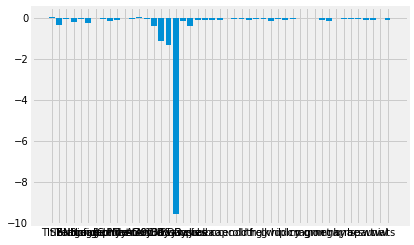

In [20]:
plt.bar(features,coefficients)

In [21]:
coefficient_df = pd.DataFrame(lr_model_dict).sort_values(by=1,ascending=False)
coefficient_df.head()

,0,1
12,AfAm,0.0622
0,Title,0.0295
24,cen,0.0028
6,Biography,-0.0023
35,mgm,-0.0023


In [22]:
coefficient_df.to_csv("../01_Data/08_Model_Outputs/Coefficients.csv")

### Extract Probabilities per Title

In [23]:
X_scaled = std_scale.transform(X)

X_probs = lr_model.predict_proba(X_scaled)[:,1]   # first column is the probability for 0 condition
                                                  # second column is the probability for the 1 condition

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [24]:
proba_df = pd.DataFrame(X_probs)
proba_df.head()

,0
0,0.0000
1,0.7161
2,0.8648
3,0.9057
4,0.7683


In [25]:
proba_df = checkout_target_df[["BibNum"]].merge(proba_df,left_index=True,right_index=True)
proba_df.head()

,BibNum,0
0,3177276,0.0000
1,395432,0.7161
2,123754,0.8648
3,193328,0.9057
4,1764894,0.7683


In [26]:
len(proba_df)

397147

In [27]:
proba_df.to_csv("../01_Data/08_Model_Outputs/Probabilities_by_BibNum.csv")

### Export Precision Scores by Probability Threshold

Logistic Regression Model best Precision score 0.942 at prob decision threshold >= 0.900


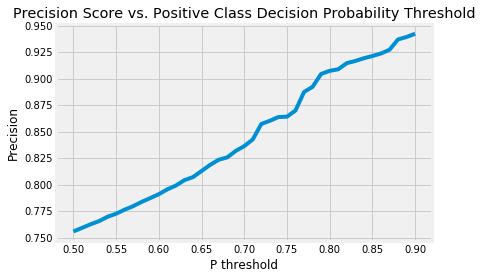

In [30]:
thresh_ps = np.arange(.50,.91,.01)
model_val_probs = lr_model.predict_proba(X_scaled)[:,1]   # first column is the probability for 0 condition
                                                              # second column is the probability for the 1 condition
precision_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    precision_scores.append(precision_score(y,model_val_labels))
    
plt.plot(thresh_ps, precision_scores)
plt.title('Precision Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('Precision')

best_precision_score = np.max(precision_scores) 
best_thresh_p = thresh_ps[np.argmax(precision_scores)]

print('Logistic Regression Model best Precision score %.3f at prob decision threshold >= %.3f' 
      % (best_precision_score, best_thresh_p)) 


In [33]:
prob_thresh_dict = list(zip(thresh_ps,precision_scores))
prob_thresh_df = pd.DataFrame(prob_thresh_dict)
prob_thresh_df = prob_thresh_df.rename({0:"Probability",1:"Precision"},axis=1)
prob_thresh_df.head(5)

,Probability,Precision
0,0.5000,0.7559
1,0.5100,0.7592
2,0.5200,0.7626
3,0.5300,0.7656
4,0.5400,0.7697


In [34]:
prob_thresh_df.to_csv("../01_Data/08_Model_Outputs/Precision_Scores_By_Probability.csv")